In [1]:
import numpy as np
import pandas as pd

print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")

numpy version: 1.26.4
pandas version: 2.2.3


/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pip install "numpy>=1.19.5,<1.27.0" --force-reinstall

  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (114 kB)
Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
yfinance 0.2.28 requires requests>=2.31, but you have requests 2.29.0 which is incompatible.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
ydata-profiling 4.6.2 requires matplotlib<=3.7.3,>=3.2, but you have matplotlib 3.9.2 which is incompatible.
ydata-profiling 4.6.2 requires numpy<1.2

In [3]:
pip install scipy --force-reinstall

  Using cached scipy-1.14.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (60 kB)
  Using cached numpy-2.2.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (116 kB)
Using cached scipy-1.14.1-cp311-cp311-macosx_12_0_arm64.whl (29.9 MB)
Using cached numpy-2.2.0-cp311-cp311-macosx_11_0_arm64.whl (14.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
streamlit 1.28.2 requires numpy<2,>=1.19

In [4]:
pip install scikit-learn --force-reinstall

  Using cached scikit_learn-1.6.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached numpy-2.2.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (116 kB)
  Using cached scipy-1.14.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.0-cp311-cp311-macosx_12_0_arm64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached numpy-2.2.0-cp311-cp311-macosx_11_0_arm64.whl (14.4 MB)
Using cached scipy-1.14.1-cp311-cp311-macosx_12_0_arm64.whl (29.9 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.5.0
    Uninstalling threadpoolctl-3.5.0:
      Successfully uninstalled threadpoolctl-3.5.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfu

In [5]:
!pip install blosc2 cython FuzzyTM requests==2.31 joblib==1.1.0 matplotlib==3.7.3 visions==0.7.5

In [6]:
file_paths = {
    "sp500_df": "S&P 500 Futures 2016 25.csv",
    "crudeoil_df": "Commodities Crude Oil WTI Futures 2016 24 (1).csv",
    "gold_df": "Commodities Gold Futures 2016 24 (1).csv",
    "eur_df": "Forex EUR_USD 2016 24 (1).csv",
    "gbp_df": "Forex GBP_USD 2016 24 (1).csv",
    "cny_df": "Forex USD_CNY 2016 24 (1).csv",
    "jpy_df": "Forex USD_JPY 2016 24 (1).csv",
    "usidx_df": "US Dollar Index 2016 24 (1).csv",
}

dfs = {key: pd.read_csv(path) for key, path in file_paths.items()}

In [7]:
#handling missing values, backward and forward fill method

for key, df in dfs.items():
    dfs[key] = df.fillna(method='ffill').fillna(method='bfill')

/var/folders/9c/9gm285k54tz9ysvymk9gtd400000gn/T/ipykernel_58623/2056327804.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfs[key] = df.fillna(method='ffill').fillna(method='bfill')


In [8]:
## Using datetime as common column to merge the datasets by setting the index.

for key, df in dfs.items():
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

In [9]:
#dataset merge using the created dataframe

combined_df = dfs['sp500_df']
for key in ['gold_df', 'crudeoil_df', 'eur_df', 'gbp_df', 'cny_df', 'jpy_df', 'usidx_df']:
    combined_df = combined_df.join(dfs[key], how='inner', rsuffix=f'_{key}')

In [10]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2236 entries, 2024-10-07 to 2016-01-04
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 2236 non-null   object 
 1   Open                  2236 non-null   object 
 2   High                  2236 non-null   object 
 3   Low                   2236 non-null   object 
 4   Vol.                  2236 non-null   object 
 5   Change %              2236 non-null   object 
 6   Gold_Price            2236 non-null   object 
 7   Open_gold_df          2236 non-null   object 
 8   High_gold_df          2236 non-null   object 
 9   Low_gold_df           2236 non-null   object 
 10  Vol._gold_df          2236 non-null   object 
 11  Change %_gold_df      2236 non-null   object 
 12  Crude_Price           2236 non-null   float64
 13  Open_crudeoil_df      2236 non-null   float64
 14  High_crudeoil_df      2236 non-null   float64
 15  Low

In [11]:
## checking the numerical columns & filling remaining with NaNs; forward fill

for col in combined_df.columns:
    if combined_df[col].dtype == object:
        combined_df[col] = (
            combined_df[col].str.replace(',', '')
            .str.replace('%', '')
            .str.replace('M', 'e6')
            .str.replace('B', 'e9')
        )
        combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

combined_df.fillna(method='ffill', inplace=True)

/var/folders/9c/9gm285k54tz9ysvymk9gtd400000gn/T/ipykernel_58623/3567694632.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method='ffill', inplace=True)


In [12]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2236 entries, 2024-10-07 to 2016-01-04
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 2236 non-null   float64
 1   Open                  2236 non-null   float64
 2   High                  2236 non-null   float64
 3   Low                   2236 non-null   float64
 4   Vol.                  2236 non-null   float64
 5   Change %              2236 non-null   float64
 6   Gold_Price            2236 non-null   float64
 7   Open_gold_df          2236 non-null   float64
 8   High_gold_df          2236 non-null   float64
 9   Low_gold_df           2236 non-null   float64
 10  Vol._gold_df          0 non-null      float64
 11  Change %_gold_df      2236 non-null   float64
 12  Crude_Price           2236 non-null   float64
 13  Open_crudeoil_df      2236 non-null   float64
 14  High_crudeoil_df      2236 non-null   float64
 15  Low

In [13]:
# Dropping all columns with "Open" or "Change %" in their names
columns_to_drop = [col for col in combined_df.columns if 'Open' in col or 'Change %' in col]

# Dropping columns with 0 non-null values
columns_with_zero_non_null = combined_df.columns[combined_df.isnull().sum() == len(combined_df)]

# Combining both lists of columns to drop
columns_to_drop.extend(columns_with_zero_non_null)

# Dropping the identified columns
combined_df = combined_df.drop(columns=columns_to_drop)

print(combined_df.columns)


Index(['Price', 'High', 'Low', 'Vol.', 'Gold_Price', 'High_gold_df',
       'Low_gold_df', 'Crude_Price', 'High_crudeoil_df', 'Low_crudeoil_df',
       'Vol._crudeoil_df', 'EUR_Price', 'High_eur_df', 'Low_eur_df',
       'GBP_Price', 'High_gbp_df', 'Low_gbp_df', 'CNY_Price', 'High_cny_df',
       'Low_cny_df', 'JPY_Price', 'High_jpy_df', 'Low_jpy_df', 'usidx_Price',
       'High_usidx_df', 'Low_usidx_df'],
      dtype='object')


In [14]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2236 entries, 2024-10-07 to 2016-01-04
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             2236 non-null   float64
 1   High              2236 non-null   float64
 2   Low               2236 non-null   float64
 3   Vol.              2236 non-null   float64
 4   Gold_Price        2236 non-null   float64
 5   High_gold_df      2236 non-null   float64
 6   Low_gold_df       2236 non-null   float64
 7   Crude_Price       2236 non-null   float64
 8   High_crudeoil_df  2236 non-null   float64
 9   Low_crudeoil_df   2236 non-null   float64
 10  Vol._crudeoil_df  1101 non-null   float64
 11  EUR_Price         2236 non-null   float64
 12  High_eur_df       2236 non-null   float64
 13  Low_eur_df        2236 non-null   float64
 14  GBP_Price         2236 non-null   float64
 15  High_gbp_df       2236 non-null   float64
 16  Low_gbp_df        2236 n

In [15]:
#Since Crude oil volume also has high null values, dropping that column: 

combined_df = combined_df.drop(columns=['Vol._crudeoil_df'])


             Price         High          Low          Vol.   Gold_Price  \
count  2236.000000  2236.000000  2236.000000  2.236000e+03  2236.000000   
mean   3483.119893  3464.056252  3416.913462  1.633864e+06  1629.636136   
std    1032.297018  1004.907342   994.624833  4.996143e+05   352.265777   
min    1824.500000  1847.250000  1802.500000  1.000000e+06  1073.600000   
25%    2644.375000  2670.062500  2623.250000  1.280000e+06  1289.200000   
50%    3213.500000  3231.250000  3190.250000  1.560000e+06  1677.450000   
75%    4336.250000  4248.437500  4191.312500  1.810000e+06  1881.325000   
max    5814.250000  5830.000000  5782.000000  5.720000e+06  2690.300000   

       High_gold_df  Low_gold_df  Crude_Price  High_crudeoil_df  \
count   2236.000000  2236.000000  2236.000000       2236.000000   
mean    1640.186941  1619.121758    63.104334         64.136480   
std      355.269566   349.359434    17.891299         18.175546   
min     1081.500000  1061.000000    11.570000         19

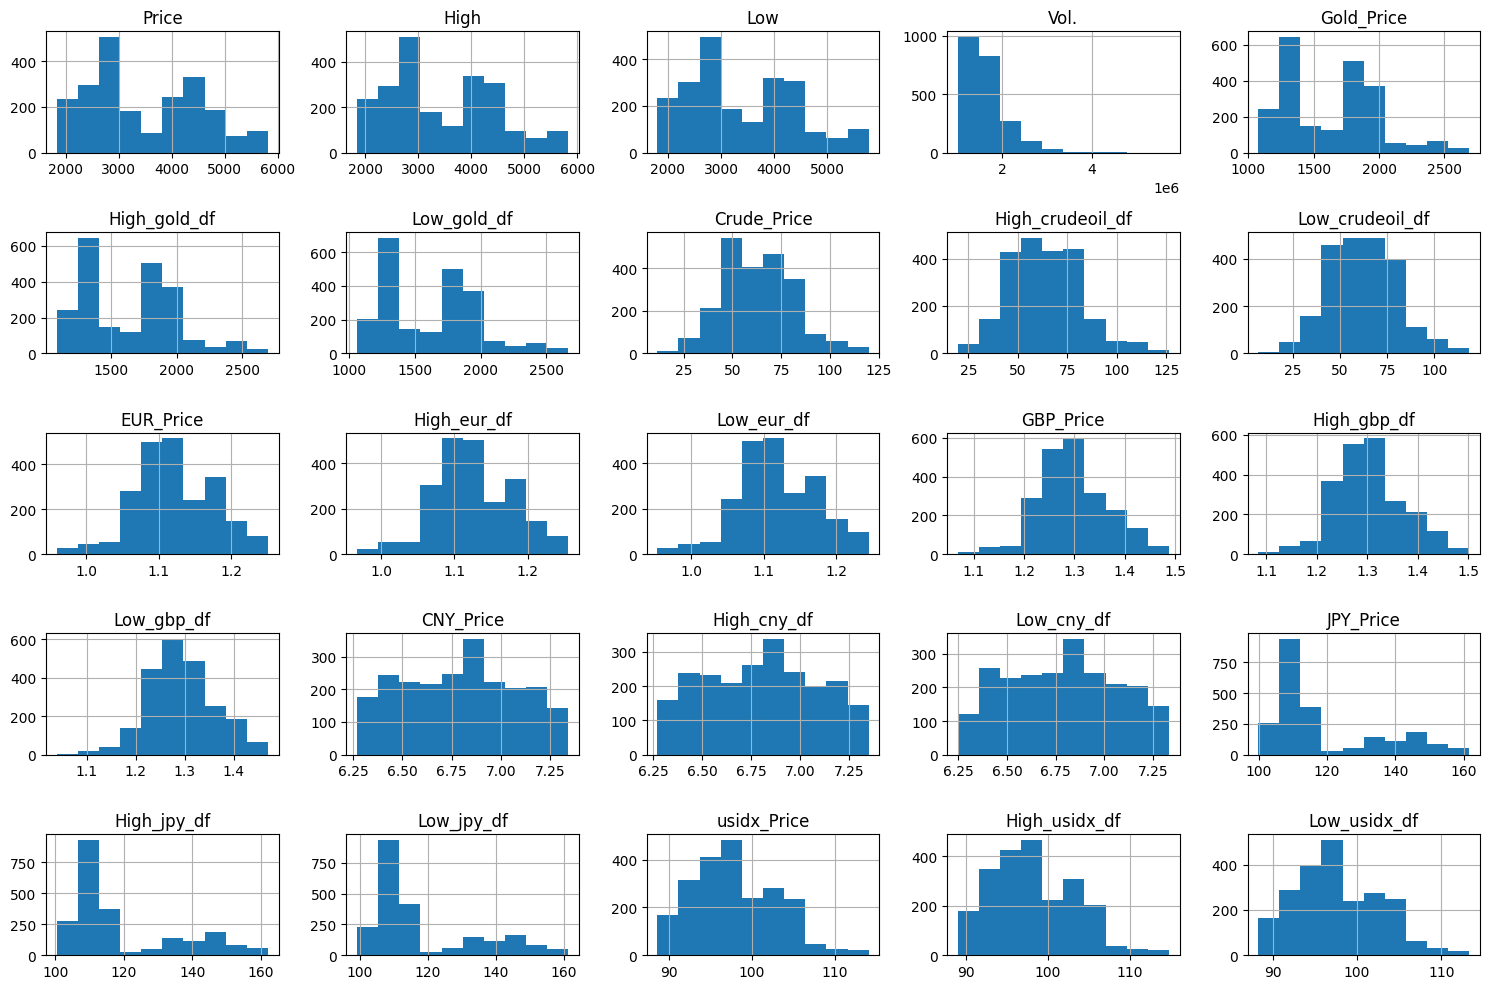

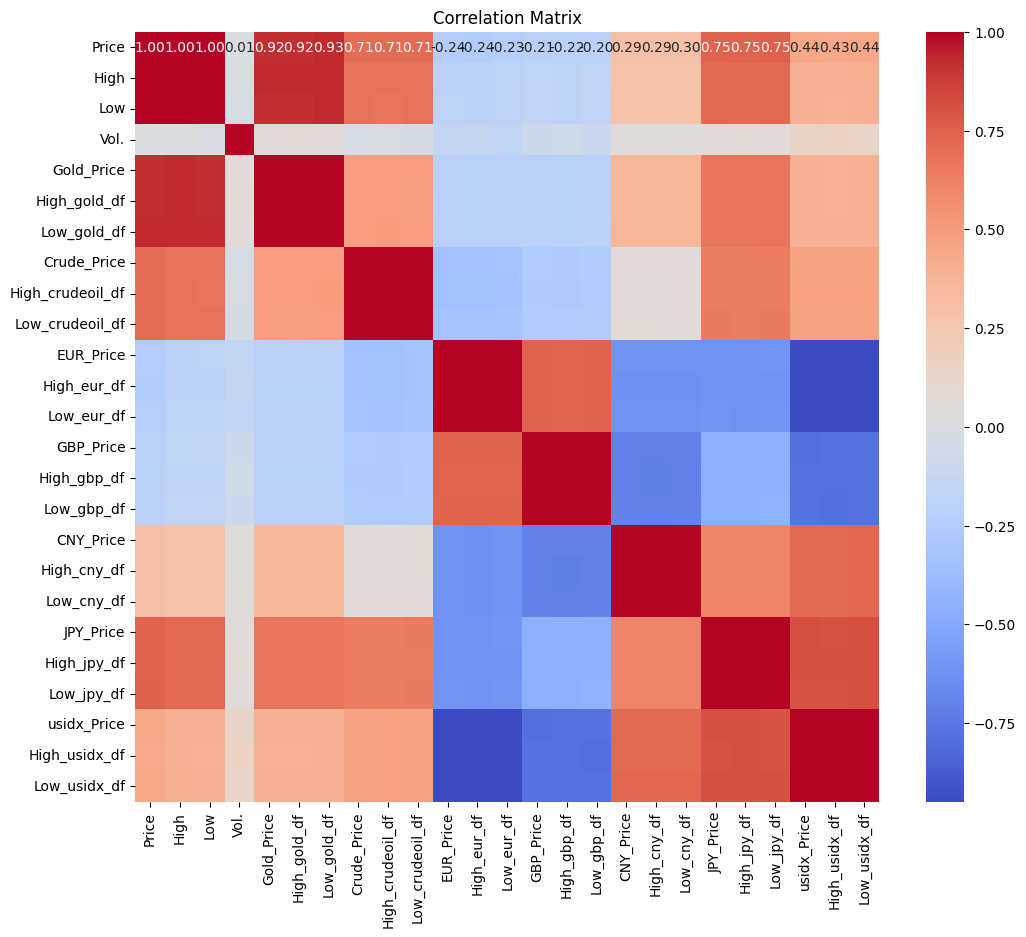

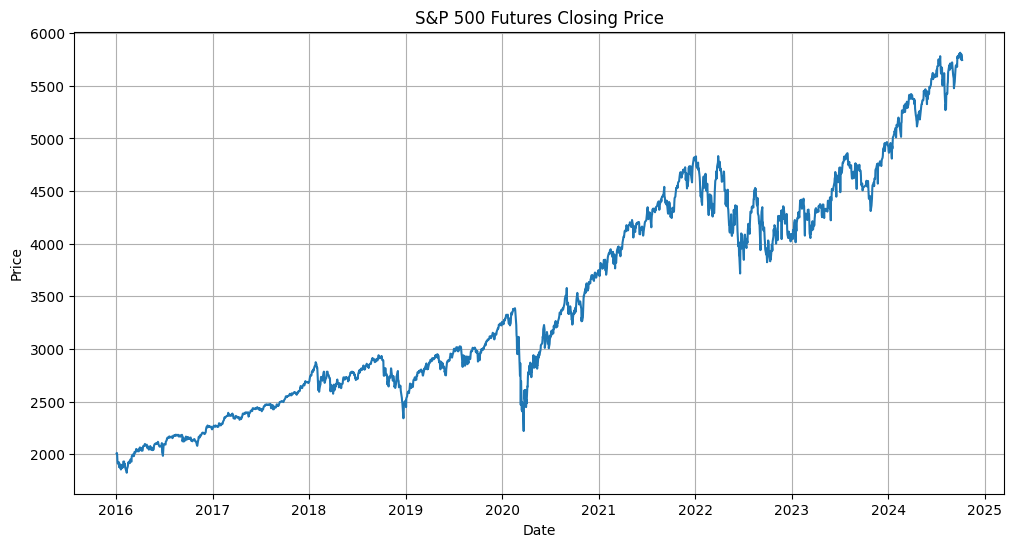

In [16]:
# EDA for modeliing and feature enginering

import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
print(combined_df.describe())

# Histograms for numerical features
combined_df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Time series plot of S&P 500 closing price
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Price'])
plt.title('S&P 500 Futures Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [18]:
# Creating the features
combined_df['Price_MA5'] = combined_df['Price'].rolling(window=5).mean().fillna(0)
combined_df['Price_volatility_7d'] = combined_df['Price'].rolling(window=7).std().fillna(0)
combined_df['Gold_to_SP500'] = (combined_df['Gold_Price'] / combined_df['Price']).fillna(0)
combined_df['DollarIndex_to_SP500'] = (combined_df['usidx_Price'] / combined_df['Price']).fillna(0)

# Calculate RSI
price_diff = combined_df['Price'].diff()
gain = price_diff.where(price_diff > 0, 0)
loss = -price_diff.where(price_diff < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
combined_df['RSI'] = (100 - (100 / (1 + (avg_gain / avg_loss)))).fillna(0)

# Display the first few rows
print(combined_df.head())


              Price     High      Low       Vol.  Gold_Price  High_gold_df  \
Date                                                                         
2024-10-07  5744.75  5808.00  5734.25  1210000.0      2666.0        2679.2   
2024-10-04  5800.00  5804.75  5741.00  1460000.0      2667.8        2690.6   
2024-10-03  5749.50  5772.75  5725.75  1420000.0      2679.2        2683.4   
2024-10-02  5760.25  5773.25  5724.00  1250000.0      2669.7        2684.8   
2024-10-01  5759.75  5822.50  5733.00  1950000.0      2690.3        2694.7   

            Low_gold_df  Crude_Price  High_crudeoil_df  Low_crudeoil_df  ...  \
Date                                                                     ...   
2024-10-07       2657.3        76.47             76.70            73.01  ...   
2024-10-04       2651.6        73.68             74.84            72.94  ...   
2024-10-03       2657.8        73.17             73.51            70.08  ...   
2024-10-02       2662.1        69.69             71.9

In [19]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2236 entries, 2024-10-07 to 2016-01-04
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 2236 non-null   float64
 1   High                  2236 non-null   float64
 2   Low                   2236 non-null   float64
 3   Vol.                  2236 non-null   float64
 4   Gold_Price            2236 non-null   float64
 5   High_gold_df          2236 non-null   float64
 6   Low_gold_df           2236 non-null   float64
 7   Crude_Price           2236 non-null   float64
 8   High_crudeoil_df      2236 non-null   float64
 9   Low_crudeoil_df       2236 non-null   float64
 10  EUR_Price             2236 non-null   float64
 11  High_eur_df           2236 non-null   float64
 12  Low_eur_df            2236 non-null   float64
 13  GBP_Price             2236 non-null   float64
 14  High_gbp_df           2236 non-null   float64
 15  Low

In [20]:
# setting binary target for daily prediction
# yesterday's clsoing for today == 0, more than yesterday for today == 1, less
# than yesterday's for today == -1.

combined_df['Binary Movement'] = 0
combined_df.loc[combined_df['Price'].diff() > 0, 'Binary Movement'] = 1
combined_df.loc[combined_df['Price'].diff() < 0, 'Binary Movement'] = -1

In [21]:
# Shifting the 'Binary Movement' column backward to represent future movements
combined_df['Binary Movement'] = combined_df['Binary Movement'].shift(-1)

# Drop the last row since it won't have a valid target after the shift
combined_df = combined_df.iloc[:-1]

# Display the updated DataFrame
print(combined_df[['Price', 'Binary Movement']].tail())


              Price  Binary Movement
Date                                
2016-01-11  1914.25             -1.0
2016-01-08  1911.50              1.0
2016-01-07  1933.00              1.0
2016-01-06  1986.00              1.0
2016-01-05  2011.75             -1.0


In [23]:
# Sort the DataFrame by Date in ascending order
combined_df = combined_df.sort_index()

# Display the updated DataFrame
print(combined_df[['Price', 'Binary Movement']].tail())


              Price  Binary Movement
Date                                
2024-10-01  5759.75              1.0
2024-10-02  5760.25             -1.0
2024-10-03  5749.50              1.0
2024-10-04  5800.00             -1.0
2024-10-07  5744.75              1.0


In [25]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2235 entries, 2016-01-05 to 2024-10-07
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 2235 non-null   float64
 1   High                  2235 non-null   float64
 2   Low                   2235 non-null   float64
 3   Vol.                  2235 non-null   float64
 4   Gold_Price            2235 non-null   float64
 5   High_gold_df          2235 non-null   float64
 6   Low_gold_df           2235 non-null   float64
 7   Crude_Price           2235 non-null   float64
 8   High_crudeoil_df      2235 non-null   float64
 9   Low_crudeoil_df       2235 non-null   float64
 10  EUR_Price             2235 non-null   float64
 11  High_eur_df           2235 non-null   float64
 12  Low_eur_df            2235 non-null   float64
 13  GBP_Price             2235 non-null   float64
 14  High_gbp_df           2235 non-null   float64
 15  Low

Accuracy: 0.52

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.55      0.68      0.61       244
         0.0       0.00      0.00      0.00         9
         1.0       0.45      0.33      0.38       194

    accuracy                           0.52       447
   macro avg       0.33      0.34      0.33       447
weighted avg       0.49      0.52      0.50       447



/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

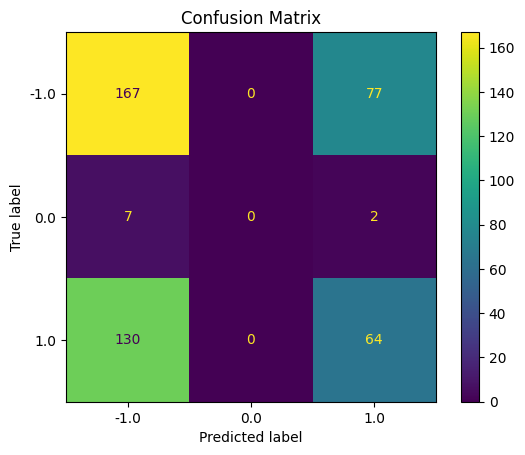

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Chronological Split (80% training, 20% testing)
split_ratio = 0.8
split_index = int(len(combined_df) * split_ratio)

train_df = combined_df.iloc[:split_index]
test_df = combined_df.iloc[split_index:]

# Step 2: Define Features and Target
features = [
    'Price', 'High', 'Low', 'Vol.', 'Gold_Price', 'High_gold_df', 'Low_gold_df',
    'Crude_Price', 'High_crudeoil_df', 'Low_crudeoil_df', 'EUR_Price',
    'High_eur_df', 'Low_eur_df', 'GBP_Price', 'High_gbp_df', 'Low_gbp_df',
    'CNY_Price', 'High_cny_df', 'Low_cny_df', 'JPY_Price', 'High_jpy_df',
    'Low_jpy_df', 'usidx_Price', 'High_usidx_df', 'Low_usidx_df',
    'Price_MA5', 'Price_volatility_7d', 'Gold_to_SP500', 'DollarIndex_to_SP500', 'RSI'
]
target = 'Binary Movement'

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Step 3: Train and Evaluate a Random Forest Model
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()


In [29]:
print(y_train.value_counts())
print(y_test.value_counts())


Binary Movement
-1.0    969
 1.0    806
 0.0     13
Name: count, dtype: int64
Binary Movement
-1.0    244
 1.0    194
 0.0      9
Name: count, dtype: int64


Accuracy: 0.58

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.57      0.95      0.71       244
         0.0       0.00      0.00      0.00         9
         1.0       0.66      0.14      0.23       194

    accuracy                           0.58       447
   macro avg       0.41      0.36      0.31       447
weighted avg       0.60      0.58      0.49       447



/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning

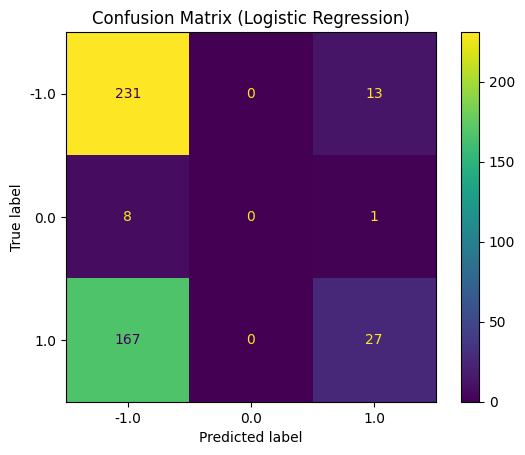

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Initialize Logistic Regression with class weights
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()


In [37]:
# Remap class labels
y_train_remapped = y_train.replace({-1: 0, 0: 1, 1: 2})
y_test_remapped = y_test.replace({-1: 0, 0: 1, 1: 2})


/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [03:49:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.54

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.69      0.36      0.47       244
         0.0       0.00      0.00      0.00         9
         1.0       0.49      0.80      0.61       194

    accuracy                           0.54       447
   macro avg       0.39      0.39      0.36       447
weighted avg       0.59      0.54      0.52       447



/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

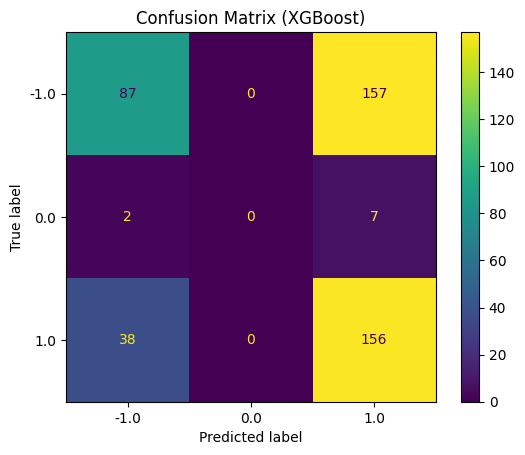

In [38]:
from xgboost import XGBClassifier

# Calculate scale_pos_weight for XGBoost (adjust based on class imbalance)
class_counts = y_train_remapped.value_counts()
scale_pos_weight = class_counts[0] / class_counts[2]  # Ratio of majority to minority class

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train_remapped)

# Make predictions
y_pred_remapped = xgb_model.predict(X_test)

# Remap predictions back to original labels
y_pred_original = pd.Series(y_pred_remapped).replace({0: -1, 1: 0, 2: 1})

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_original):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_original))

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_original)
plt.title("Confusion Matrix (XGBoost)")
plt.show()
